In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [2]:
def RGB2HEX(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [3]:
def getImage(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (600,600))
  return image

In [6]:
def imageTest(image):
  print("The type of this input is {}".format(type(image)))
  print("Shape: {}".format(image.shape))
  plt.imshow(image)

The type of this input is <class 'numpy.ndarray'>
Shape: (600, 600, 3)


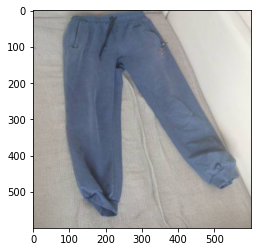

In [7]:
path = "/content/drive/MyDrive/Colab Notebooks/TestPants.jpg"

firstPants = getImage(path)
imageTest(firstPants)

In [43]:
def getColorsExplanation(image, numberOfColors, showChart):
  #resize the image to reduce the extraction time (INTER_AREA is just a certain way they resize it)
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  #Reshape the image to make sure it's in two dimensions so we can use Numpy on it
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  #the KMeans algorithm makes clusters (in our case we want clusters of colors) based on how many colors we want
  clf = KMeans(n_clusters = numberOfColors)
  #Computes the center of each cluster and has an index for each cluster now
  labels = clf.fit_predict(modified_image)

  #elements are stored as dictionary keys based on how many "numberOfColors" we pass through
  #So passing numberOfColors = 3, count would be something like Counter({1: 105944, 0: 94719, 2: 39337})
  counts = Counter(labels)
  
  #finds the center of all the clusters (the center of the 0,1,2 mentioned above, respectively)
  center_colors = clf.cluster_centers_
  #iterates over the keys (the keys in example would be 0,1,2 respectively) and divides each value by 255 to get their values in the 0-1 range
  ordered_colors = [center_colors[i]/255 for i in counts.keys()]
  #getting the hex colors
  hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
  #getting the rgb colors
  rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]

  if (showChart):
    plt.figure(figsize = (8,6))
    plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)

  return rgb_colors;



In [46]:
def getColors(image, numberOfColors, showChart):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = numberOfColors)
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)
  
  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i]/255 for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
  rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]

  if (showChart):
    plt.figure(figsize = (8,6))
    plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)

  return rgb_colors;

[array([188.47626636, 185.20931252, 179.02718182]),
 array([ 89.6359747 , 102.49587232, 126.04966719])]

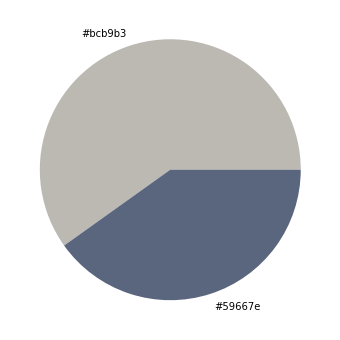

In [47]:
getColors(firstPants, 2, True)